In [2]:
import kagglehub
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
dataset_path = Path(path) / 'chest_xray' / 'chest_xray'

train = dataset_path / 'train'
test = dataset_path / 'test'
val = dataset_path / 'val'

pneunomia = 'PNEUMONIA'
normal = 'NORMAL'


# 1st Analysis of the Dataset
One of the most crucial points in designing the architecture of a Neural Network is to estimate how much data is provided in order to feed NN.
**So we must measure how large is the dataset and how many images are included**

the dataset size is: 1236.86 MB


[Text(0, 3, '5860')]

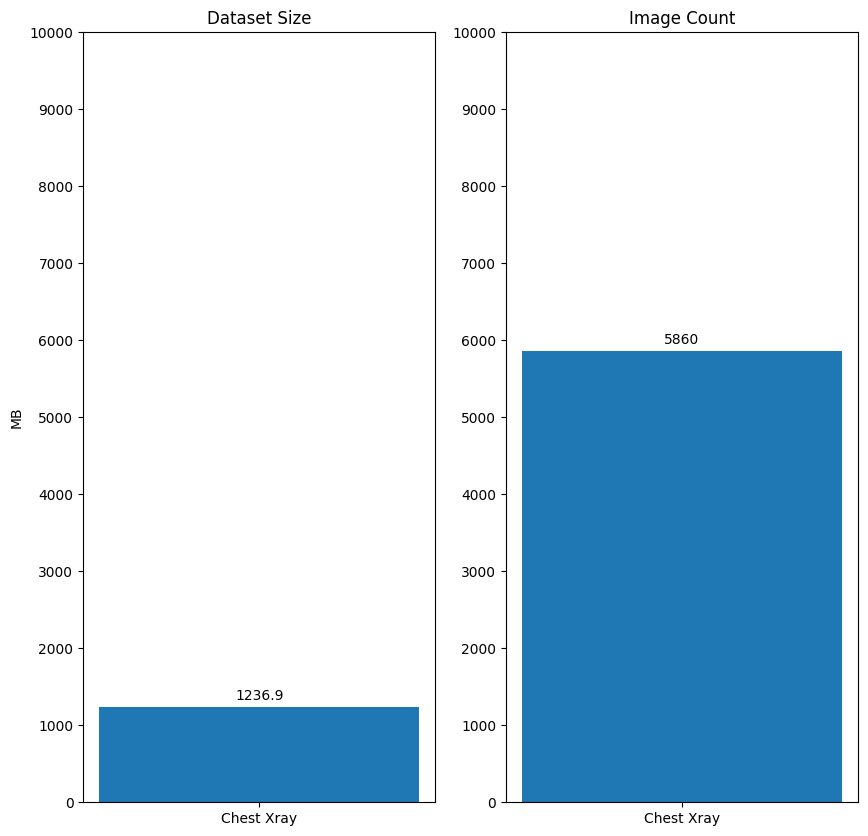

In [12]:
total_size = 0
images_count = 0

for path, dirs, files in os.walk(dataset_path):
    for f in files:
        if dirs:
            continue
        images_count += 1
        f_ = os.path.join(path, f)
        total_size += os.path.getsize(f_)

print(f'the dataset size is: {np.round(total_size / 10**6, 2)} MB')

fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
bar = ax.bar('Chest Xray', np.round(total_size / 10**6, 2))
ax.set_yticks(np.linspace(0, 10000, 11))
ax.set_ylabel('MB')
ax.set_title('Dataset Size')
ax.bar_label(bar, fmt='%.1f', padding=3)


ax = plt.subplot(1, 2, 2)
bar = ax.bar('Chest Xray', images_count)
ax.set_yticks(np.linspace(0, 10000, 11))
ax.set_title('Image Count')
ax.bar_label(bar, fmt='%d', padding=3)

# 2nd Analysis of the Dataset
Taking a look at how the dataset is divided

Text(0, 0.5, 'Percentage')

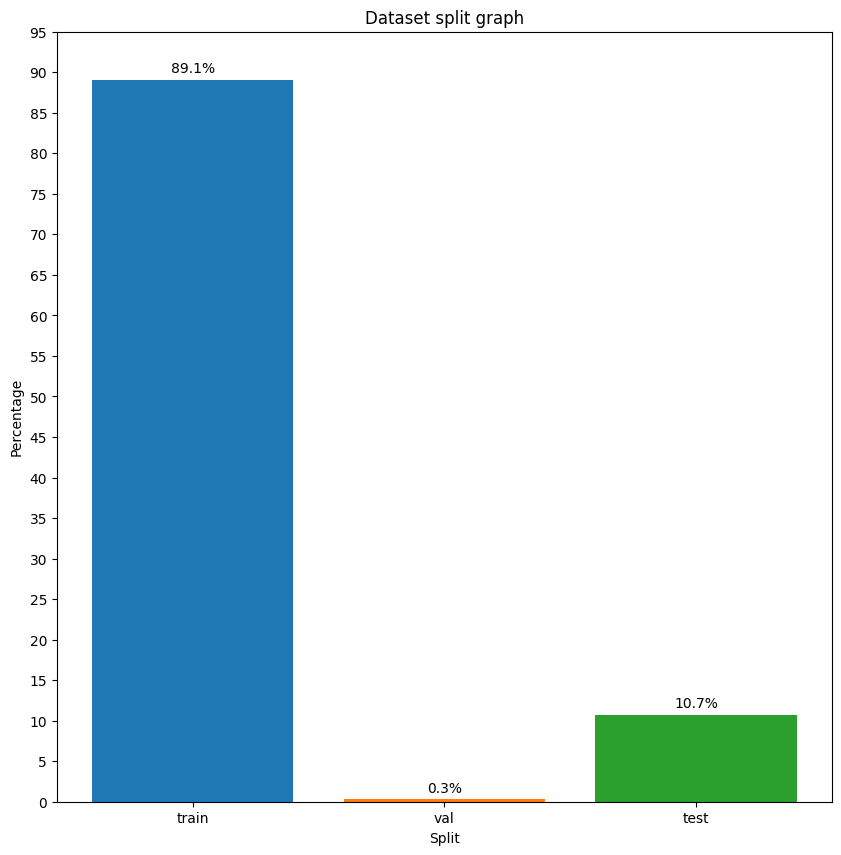

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

split_train_count = len(list(train.glob('*/*.jpeg')))
split_val_count = len(list(val.glob('*/*.jpeg')))
split_test_count = len(list(test.glob('*/*.jpeg')))

total = split_train_count + split_val_count + split_test_count


for count, set_name in zip([split_train_count, split_val_count, split_test_count ], ['train', 'val', 'test']):
  bar = ax.bar(set_name, np.round(count / total * 100, 1))
  ax.bar_label(bar, fmt='%.1f%%', padding=3)



ax.set_yticks(np.arange(0, 100, 5))
ax.set_title('Dataset split graph')
ax.set_xlabel('Split')
ax.set_ylabel('Percentage')


# 3rd Analysis of the Dataset
Checking if the sets are balanced

Exploring train --- Pneumonia images: 3876 --- Normal images: 1342
Exploring val --- Pneumonia images: 9 --- Normal images: 9
Exploring test --- Pneumonia images: 390 --- Normal images: 234


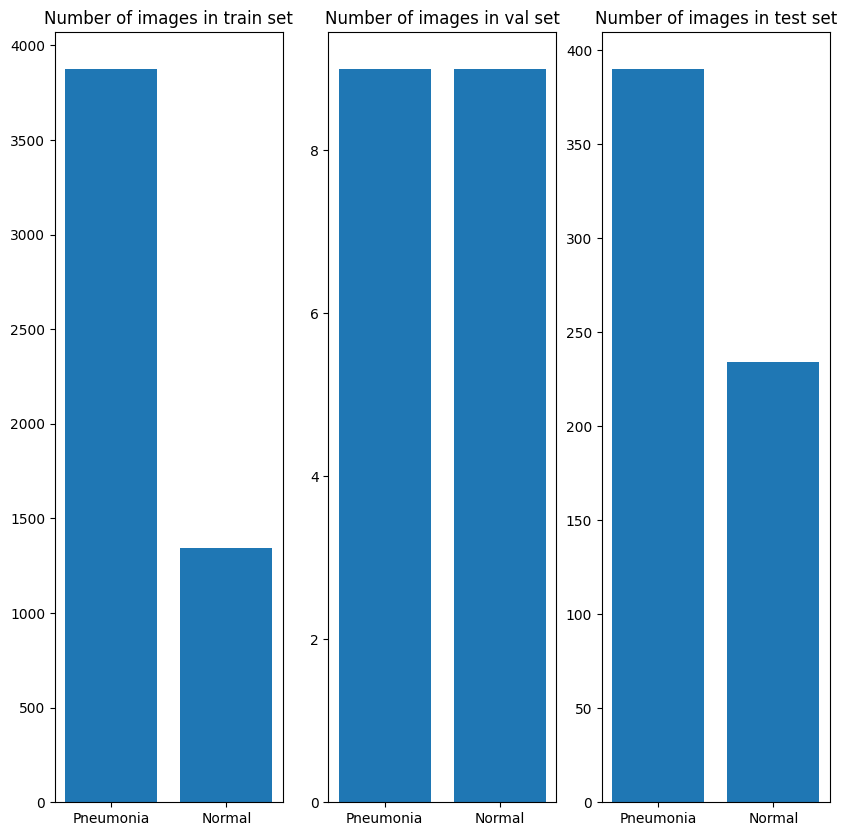

In [15]:
fig = plt.figure(figsize=(10, 10))

for _, setname, i in zip([train, val, test], ['train', 'val', 'test'], np.arange(1,4)):
  count_pneumonia = len(list(_.glob(pneunomia + '/*')))
  count_normal = len(list(_.glob(normal + '/*')))
  
  print(f'Exploring {setname} --- Pneumonia images: {count_pneumonia} --- Normal images: {count_normal}')

  plt.subplot(1, 3, i)
  plt.bar(['Pneumonia', 'Normal'], [count_pneumonia, count_normal])
  plt.title(f'Number of images in {setname} set')


# 4th Analysis of the Dataset
Analayzing the data structure of images, whether they have 3 RGB channels or they have only 1 channel (GRAYSCALE)
